In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import os

%matplotlib inline

In [2]:
# === DISASTER LIST ===
directory = 'D:/sibeleker/surfdrive/Documents/Bangladesh/DisasterList/' 
file = 'DisasterList_v2.xlsx'
disaster_df = pd.read_excel(directory+file)
disaster_df.head()

,Start date,End date,Country name,ISO,Location,Disaster type,Disaster subtype,Associated dis.,Associated dis2.,Total deaths,Total affected,Total damage,Insured loss,Disaster ID
15,00/00/1960,00/00/1960.1,Bangladesh,BGD,Unnamed: 4,Flood,--,--,--,10000,--,--,--,1960-0001
22,00/07/1963,00/07/1963.1,Bangladesh,BGD,Unnamed: 4,Flood,--,--,--,30,--,--,--,1963-0069
25,00/07/1964,00/07/1964.1,Bangladesh,BGD,"Rangpur, Comilla",Flood,--,--,--,--,1000000,5000,--,1964-0039
29,00/06/1966,00/06/1966.1,Bangladesh,BGD,Sylhet,Flood,--,--,--,39,500000,1000,--,1966-0047
34,00/07/1968,00/07/1968.1,Bangladesh,BGD,"Nationwide, 5 Northern",Flood,--,--,--,221,15889616,199400,--,1968-0054


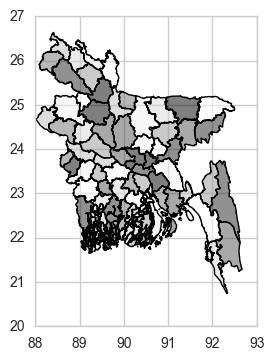

In [3]:
# ===DISTRICT BOUNDARIES ===
directory_dist = 'D:/sibeleker/surfdrive/Shared/Worldbank Bangladesh/2_GIS_data/BGD_admin_boundaries_level_0123_GADM/'
file_dist = 'BGD_adm2.shp'
district_gdf = gpd.read_file(directory_dist+file_dist)
district_gdf.plot()

In [4]:
# make a new df, only for floods, with flood id, start and end date, duration, and the name of districts/upazilas affected
from datetime import datetime

flood_df = disaster_df[disaster_df['Disaster type']=='Flood']
flood_df = flood_df[['Start date', 'End date', 'Location', 'Disaster ID', 'Disaster subtype']]
for index,row in flood_df.iterrows():
    if row['End date'].endswith('.1'):
        flood_df.ix[index, 'Duration'] = 1
    else:
        start = datetime.strptime(row['Start date'], "%d/%m/%Y")
        end = datetime.strptime(row['End date'], "%d/%m/%Y")#'%b %d %Y')
        flood_df.ix[index, 'Duration'] = (end-start).days 
        #print(flood_df.ix[index, 'Duration'])
flood_df.head()

,Start date,End date,Location,Disaster ID,Disaster subtype,Duration
15,00/00/1960,00/00/1960.1,Unnamed: 4,1960-0001,--,1.0
22,00/07/1963,00/07/1963.1,Unnamed: 4,1963-0069,--,1.0
25,00/07/1964,00/07/1964.1,"Rangpur, Comilla",1964-0039,--,1.0
29,00/06/1966,00/06/1966.1,Sylhet,1966-0047,--,1.0
34,00/07/1968,00/07/1968.1,"Nationwide, 5 Northern",1968-0054,--,1.0


In [10]:
file_dist = 'list-districts-bangladesh.xlsx'
district_df = pd.read_excel(directory+file_dist)
correct_districts = list(district_df['District'])
correct_districts = sorted(correct_districts[:-4])
print(correct_districts)
print(len(correct_districts))

['Bagerhat', 'Bandarban', 'Barguna', 'Barisal', 'Bhola', 'Bogra', 'Brahmanbaria', 'Chandpur', 'Chittagong', 'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj', 'Habiganj', 'Jamalpur', 'Jessore', 'Jhalokati', 'Jhenaidah', 'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura', 'Manikganj', 'Meherpur', 'Moulvibazar', 'Munshiganj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore', 'Nawabganj', 'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh', 'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj', 'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon']
64


In [6]:
districts = list(district_gdf['NAME_2'])
#upazilas = list(upazila_gdf['NAME_3'])

In [13]:
districts = sorted(districts)
#print(districts)
for d1, d2 in zip(districts, correct_districts):
    if d1 != d2:
        if different_characters(d1,d2)[0] == 1:
            print(d1,d2)
            district_gdf.loc[district_gdf['NAME_2'] == d1, 'NAME_2'] = d2
            #district_gdf.replace({d1:d2}, regex=True)
#print(sorted(list(district_gdf['NAME_2'])))
#CORRECT THE DISTRICT NAME COLUMN OF DISTRICT_GDF
#if the gdf name is not in coorect names
#
#district_gdf['NAME_2'] = 
#CORRECT THE ..

Bandarbon Bandarban
Gaibanda Gaibandha
Gopalgonj Gopalganj
Hobiganj Habiganj
Manikgonj Manikganj
Munshigonj Munshiganj
Rongpur Rangpur
Sirajgonj Sirajganj


In [14]:
codes = {}
for index, row in district_gdf.iterrows():
    dist_name = row['NAME_2']
    dist_code = row['HASC_2'].split('.')[-1]
    codes[dist_name] = dist_code
print(codes)    

{'Bogra': 'BO', 'Pirojpur': 'PR', 'Rajshahi': 'RS', 'Netrakona': 'NK', 'Chittagong': 'CT', 'Manikganj': 'MK', 'Choua Danga': 'CD', 'Jaipurhat': 'JP', 'Moulvibazar': 'MB', 'Chandpur': 'CP', 'Habiganj': 'HA', 'Jhalakati': 'JK', 'Lakshmipur': 'LK', 'Kurigram': 'KR', 'Gaibandha': 'GB', 'Naogaon': 'NA', 'Magura': 'MG', 'Lalmonirhat': 'LL', 'Dhaka': 'DH', 'Borgona': 'BG', 'Khulna': 'KL', 'Naray Angonj': 'NY', 'Gazipur': 'GZ', 'Jhenaidah': 'JN', 'Bandarban': 'BD', 'Dinajpur': 'DJ', 'Rajbari': 'RB', 'Kustia': 'KU', 'Panchagarh': 'PN', 'Meherpur': 'ME', 'Thakurgaon': 'TH', 'Khagrachari': 'KG', 'Noakhali': 'NO', 'Narail': 'NR', 'Shariatpur': 'SA', 'Natore': 'NT', 'Bhola': 'BL', 'Faridpur': 'FR', 'Barisal': 'BS', 'Madaripur': 'MD', 'Sherpur': 'SP', 'Rangpur': 'RP', 'Patuakhali': 'PT', 'Shatkhira': 'ST', 'Kishoreganj': 'KS', 'Nasirabad': 'MM', 'Brahmanbaria': 'BB', 'Feni': 'FN', 'Jessore': 'JS', 'Bagerhat': 'BH', 'Munshiganj': 'MU', 'Gopalganj': 'GG', 'Sun Amgonj': 'SN', 'Nawabganj': 'NW', 'Comill

In [29]:
code_df = pd.DataFrame.from_dict(codes, orient='index')
code_df.to_excel(directory+'District_codes.xlsx')

In [12]:
def different_characters(str1, str2):
    count = 0
    diff = []
    l1 = len(str1)
    l2 = len(str2)
    if l1 == l2:
        for c1, c2 in zip(str1, str2):
            if c1 != c2:
                count += 1
                diff.append(c1)
    else:
        for i in range(min(l1, l2)):
            if str1[i] != str2[i]:
                count += 1
                diff.append(str1[i])
    return count, diff

In [16]:
district_correction = {'Habaganj':'Habiganj',
                       'Rajbari district' : 'Rajbari',
                       'Mymensing': 'Mymensingh',
                       'Netrokona': 'Netrakona',
                       'Lalmonirat':'Lalmonirhat',
                       'Narayangani': 'Narayanganj',
                       'Gaibanda':'Gaibandha',
                       'Sariatpur':'Shariatpur',
                       'Panchagar':'Panchagarh',
                       'Maulvibazar':'Moulvibazar',
                       'Coxbazar':"Cox's Bazar",
                       'Nilhamari':'Nilphamari',
                       'Sirajangj':'Sirajganj',
                       'Patuakhil':'Patuakhali',
                       'Moulavibazar':'Moulvibazar',
                       'Noahkali':'Noakhali',
                       'Brahmambaria':'Brahmanbaria',
                       'Hobiganj':'Habiganj',
                       'Brahamanbaria':'Brahmanbaria',
                       'Manikanj':'Manikganj',
                       'Kurigram a Nil':'Kurigram',
                       'Nilpamari':'Nilphamari',
                       'Chitagong':'Chittagong',
                       'Noagaon':'Naogaon',
                       'Serajganj':'Sirajganj',
                       "Cox's Bazaar":"Cox's Bazar"}

In [17]:
flood_df = flood_df[flood_df['Location'] != 'Unnamed: 4']
print(len(flood_df.index))
locations = {}
for index,row in flood_df.iterrows():
    locations[row['Disaster ID']] = []
    loc = row['Location'].split(',')
    for i,dist in enumerate(loc):
        if dist.startswith(' '):
            loc[i] = dist.strip()
        if loc[i] in district_correction.keys():
            locations[row['Disaster ID']].append(district_correction[loc[i]])
        else:
            locations[row['Disaster ID']].append(loc[i])
    #print(loc)
    #subset = set(loc).issubset(set(districts))
    #print(subset)
    #flood_df.ix[index, 'Location'] = str(loc)

    

77


In [18]:
print(len(locations.keys()))

77


In [19]:
to_remove = []
print(len(locations.keys()))
for key, value in locations.items():
    #print(key, value)
    for loc in value:
        if loc in districts or loc in correct_districts:
            #district_gdf['flooded'][district_gdf['NAME_2']==loc] = 1
            pass
        else:
            value.remove(loc)
    if not value:
        to_remove.append(key)
for key in to_remove:
    del locations[key]
print(len(locations.keys()))

77
68


In [22]:
# convert locations to codes:
loc_codes = {}
for key, value in locations.items():
    new_value = []
    for v in value:
        if v in codes.keys():
            new_value.append(codes[v])
    if new_value:
        loc_codes[key] = new_value
print(len(loc_codes.keys()))

61


In [26]:
loc_df = pd.DataFrame.from_dict(loc_codes, orient='index')
loc_df.columns = ['Flood_id'] + ['Districts'] * 24
loc_df.to_csv(directory+'flood_locations.csv')

In [20]:
maks=max(locations, key=lambda k: len(locations[k]))
print(maks, len(locations[maks]))

2003-0283 27


In [54]:
# for key, value in locations.items():
#     if len(value) < 27:
#         new_value = [None] * 27
#         for i,v in enumerate(value):
#             new_value[i] = v
#         locations[key] = new_value
for key, value in locations.items():
    #print(value)
    new_value = ', '.join(value)
    #print(new_value)
    locations[key] = new_value
loc = pd.DataFrame.from_dict(locations, orient='index')
loc.to_excel(directory+'locations_v2.xlsx')

In [ ]:
district_gdf['flooded'] = 0
for key, value in locations.items():
    print(key, value)
    for loc in value:
        if loc in districts or loc in correct_districts:
            district_gdf['flooded'][district_gdf['NAME_2']==loc] = 1
    
    new_gdf = district_gdf[district_gdf['flooded'] == 1]
    
    if not new_gdf.empty:
        fn = directory+'ShpFiles/'+'{}.shp'.format(key)
        new_gdf.to_file(filename=fn)
    
        fig, ax = plt.subplots(figsize=(6, 8))

        new_gdf['coords'] = new_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
        new_gdf['coords'] = [coords[0] for coords in new_gdf['coords']]

        district_gdf.plot(ax=ax, color='white', linewidth=0.1)
        new_gdf.plot(ax=ax, color='orange', linewidth=0.1)

        for idx, row in new_gdf.iterrows():
            plt.annotate(s=row['NAME_2'], xy=row['coords'],
                     ha='center', va='center', fontsize=8, rotation=30)
        ax.set_axis_off()
        start = flood_df.loc[flood_df['Disaster ID'] == key, 'Start date'].iloc[0]
        typ = flood_df.loc[flood_df['Disaster ID'] == key, 'Disaster subtype'].iloc[0]
        title = "Flood {}, started on {}, {}".format(key, start, typ)
        ax.set_title(title, fontsize=12)

        district_gdf['flooded'] = 0

        plt.savefig(directory+'Figures/'+"{}.png".format(key), dpi=300)
    #plt.show()


In [ ]:
#to do
# correct the names and re-plot
# upazila level data points, so read the upazila shape file
# animation or plot upon input